In [683]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Garch(2,2) Model

### First I will define first 2 elements of normal time series and volatility time series, and then create a simulated time series based on garch formula.

### Reason to create garch data like this to check if we can get the same parameters back after fitting the garch model back to the simulated time series.

### $ a_{t} = \epsilon_{t} * \sqrt {\omega + \alpha_{1}*a_{t-1}^{2} + \alpha_{2}*a_{t-2}^{2} + \beta_{1}*\sigma_{t-1}^{2} + \beta_{2}*\sigma_{t-2}^{2}}$

### What ever is under square root above is the volatility component

### $ a_{0},  a_{1} \sim \mathcal{N}(0,1) $

### $ \sigma_{0}, \sigma_{1} = 1, 1$

### $ \epsilon_{t} \sim \mathcal{N}(0,1)$

In [684]:
"""dataset creation based on above conditions"""

n = 1000

"""These are just random numbers"""
omega = 0.5

alpha_1 = 0.1 # remember if you keep these variable high value, your simulated time series will explode
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

In [685]:
"""Both time series and it's volatility time series"""

time_series = [gauss(0,1), gauss(0,1)]
vol_time_series = [1, 1]

In [686]:
""" Simulating time series based on garch formula"""

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*time_series[-1]**2 + alpha_2*time_series[-2]**2 + beta_1*vol_time_series[-1]**2 + beta_2*vol_time_series[-2]**2)
    new_time_series = gauss(0,1) * new_vol
    
    vol_time_series.append(new_vol)
    time_series.append(new_time_series)

Text(0.5, 1.0, 'Simulated Garch(2,2) data')

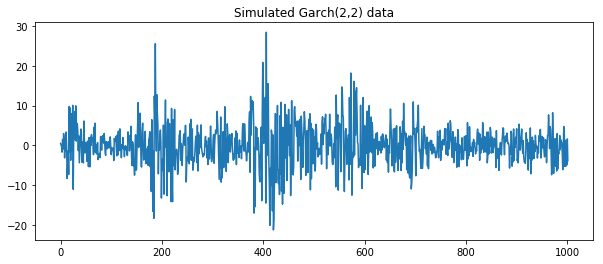

In [687]:
plt.figure(figsize=(10, 4))
plt.plot(time_series)
plt.title("Simulated Garch(2,2) data")

## We can observe that volatility is high in some regions while low in other regions

Text(0.5, 1.0, 'Volatility of above time series')

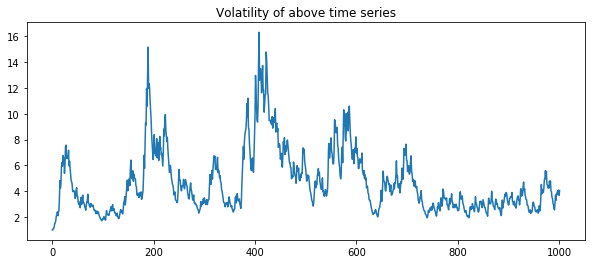

In [688]:
plt.figure(figsize=(10,4))
plt.plot(vol_time_series)
plt.title("Volatility of above time series")

## It can be observe that volatility plot correctly describe what we observed above.

Text(0.5, 1.0, "Comparison of time series data and it's volatility time series")

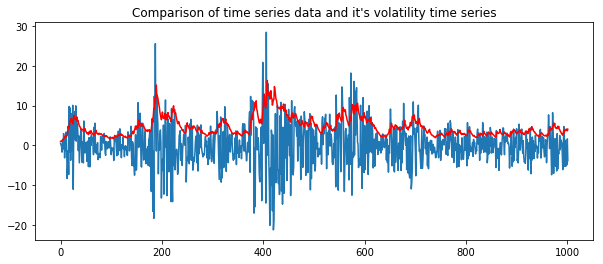

In [689]:
plt.figure(figsize=(10,4))
plt.plot(time_series)
plt.plot(vol_time_series, color="red")
plt.title("Comparison of time series data and it's volatility time series")

## Now we will identify what the AR and MA terms in the volatility time series by plotting PACF for AR and ACF for MA terms. 

## Look into plot of square ff your time series for PACF and ACF plot, look into above main equation for GARCH model

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


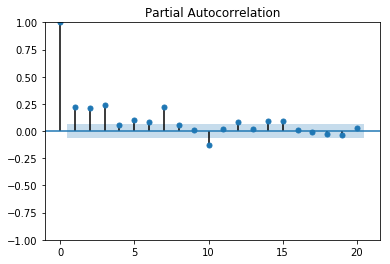

In [690]:
square_time_series = np.array(time_series)**2
plot_pacf(square_time_series, lags=20)
plt.show()

## PACF plot will directly show us what Garch model to use, if it shows 2 , then will use 2 terms of time series and also volatility series. Although above graph also 3, 4 as significant but we can assume that it is Shutting off significantly after there.

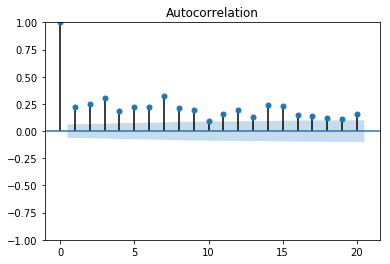

In [691]:
plot_acf(square_time_series, lags=20)
plt.show()

## ACF plot shows lots of significant correlation terms but remember it only proves the numbers of error terms to be included i.e. error term in square series which is no where used in our model, so it does not convey anything and should not be used for anything

In [692]:
"""spliting data set in Train and Test"""

test_size = int(n*0.9)
train, test = time_series[:test_size], time_series[test_size:]

In [693]:
model = arch_model(train, p=2, q=2)

In [694]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 265882.67329799425
Iteration:      2,   Func. Count:     17,   Neg. LLF: 160479.1279119315
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2950.762457968064
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2595.273972847846
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2592.030901583019
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2592.367297341445
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2701.9606914865853
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2591.5317307524824
Iteration:      9,   Func. Count:     76,   Neg. LLF: 2591.442923245363
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2591.424971851599
Iteration:     11,   Func. Count:     90,   Neg. LLF: 2591.424396791963
Iteration:     12,   Func. Count:     97,   Neg. LLF: 2591.424199531927
Iteration:     13,   Func. Count:    104,   Neg. LLF: 2591.4241751741474
Iteration:     14,   Func. Count:    111,   Neg. LLF: 2591.4

In [695]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2591.42
Distribution:                  Normal   AIC:                           5194.85
Method:            Maximum Likelihood   BIC:                           5223.66
                                        No. Observations:                  900
Date:                Mon, Jul 18 2022   Df Residuals:                      899
Time:                        14:05:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0811      0.117     -0.695      0.487 [ -0.310,  0.147]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5055      0.213      2.374  1.758e-02  [8.823e-02,  0.923]
alpha[1]       0.1402  4.346e-02      3.225  1.258e-03  [5.500e-02,  0.225]
alpha[2]       0.0752  6.961e-02      1.080      0.280 [-6.126e-02,  0.212]
beta[1]        0.7760      0.267      2.906  3.664e-03    [  0.253,  1.299]
beta[2]    1.0185e-17      0.216  4.722e-17      1.000    [ -0.423,  0.423]
===========================================================================

Covariance estimator: robust
"""

In [696]:
print(f"Actual Omega was {omega}")
print(f"Actual Alpha_1 was {alpha_1}")
print(f"Actual Alpha_2 was {alpha_2}")
print(f"Actual Beta_1 was {beta_1}")
print(f"Actual Beta_2 was {beta_2}")

Actual Omega was 0.5
Actual Alpha_1 was 0.1
Actual Alpha_2 was 0.2
Actual Beta_1 was 0.3
Actual Beta_2 was 0.4


### It's very important to check for p-values, if it's not small, then you will get very different results and it will not reliable at all

## Results are quite off but consider it for a learning process

# Predict on test set

In [697]:
predictions = model_fit.forecast(horizon=len(test), reindex=True)

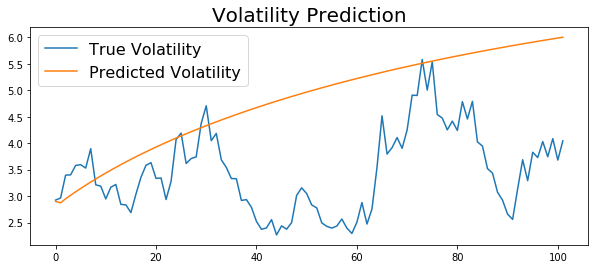

In [698]:
plt.figure(figsize=(10, 4))
true, = plt.plot(vol_time_series[test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1,:]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## We can observe that volatility predictions is rising up and up constantly and only good for small number of observations at the start of period which is true as we go way into future, errors will piled up. 

## Let predict for larger period to observe how it behaves, it should flatten out after sometime?

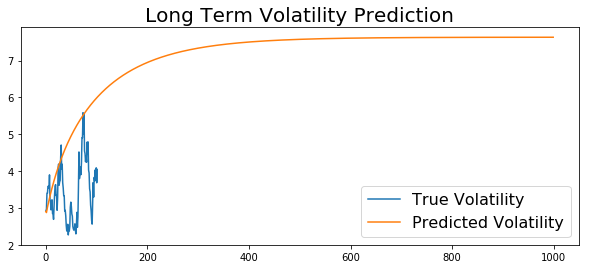

In [699]:
predictions_long_term = model_fit.forecast(horizon=1000, reindex=True)
plt.figure(figsize=(10,4))
true, = plt.plot(vol_time_series[test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## this volatility prediction for a longer term does not make sense at all

# Rolling forecast origin

## Try to predict only 1 period in advance instead of hundered and then try to check how well the model if fitting

In [700]:
rolling_prediction = []

for i in range(len(time_series) - test_size):
    train = time_series[:(test_size+i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1, reindex=True)
    value = np.sqrt(np.sqrt(pred.variance.values[-1,:][0]))
    rolling_prediction.append(value)

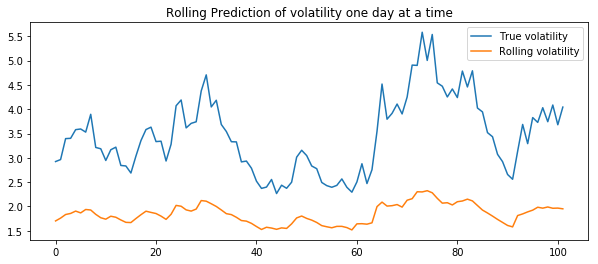

In [701]:
plt.figure(figsize=(10,4))
true, = plt.plot(vol_time_series[test_size:])
preds, = plt.plot(rolling_prediction)
plt.title("Rolling Prediction of volatility one day at a time")
plt.legend(['True volatility', 'Rolling volatility'])

## Volatility trend follows similar structure but value divert roughly by half, may be i have missed some factor somewhere, need to recheck